In [1]:
%matplotlib inline
import pandas as pd
from pipeline import run_pipeline
# JV note: recapitulates 13.1_fragment_prioritization_pipeline_v5_script_0.05_17atom_on_800K_and_orderable and out/pipeline_v5_script/frag_0.05_17atom_800K_and_5mil;

/Users/jackie16201/opt/anaconda3/envs/torch_environment/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/Users/jackie16201/Desktop/Spring_2023/fragments_discovery_design_ML/src/pipeline.py:12: DeprecationWarning: The rdkit.Chem.MCS module is deprecated; please use rdkit.Chem.rdFMCS instead.
  from rdkit.Chem import MCS


In [2]:
# save metadata
broad800k = pd.read_csv('../out/model_preds_on_frags_and_cpds/SA/combined_broad_preds_05_20_2022.csv')
metadata = pd.read_csv('../data/static_datasets/PublicStructures.txt', sep = '\t')
broad800k = broad800k.merge(metadata, left_on = 'smiles', right_on = 'SMILES', how = 'left')
broad800k = broad800k.drop_duplicates('smiles')
broad800k = broad800k[['smiles', 'Name', 'ACTIVITY']]
broad800k.to_csv('../out/model_preds_on_frags_and_cpds/SA/combined_broad_preds_with_metadata_05_20_2022.csv')

# orderable 5 mil molecules
orderable = pd.read_csv('../out/model_preds_on_frags_and_cpds/SA/combined_orderable_5mil_preds_08_01_2022.csv')
orderable['smiles'] = orderable['SMILES']
orderable['Name'] = orderable['Database']
orderable = orderable[['smiles', 'Name', 'ACTIVITY']]

# combine them
full_cpd_df = broad800k.append(orderable)
full_cpd_df.to_csv('../out/model_preds_on_frags_and_cpds/SA/combined_broad_preds_and_5mil_orderable_preds.csv', index = False)

/var/folders/py/8hwb28r933z4xh4q0dw5hz2h0000gn/T/ipykernel_36804/1561465519.py:10: DtypeWarning: Columns (1,2,3) have mixed types. Specify dtype option on import or set low_memory=False.
  orderable = pd.read_csv('../out/model_preds_on_frags_and_cpds/SA/combined_orderable_5mil_preds_08_01_2022.csv')
/var/folders/py/8hwb28r933z4xh4q0dw5hz2h0000gn/T/ipykernel_36804/1561465519.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  full_cpd_df = broad800k.append(orderable)


In [3]:
# ACTUAL VALUES for SA round 2

# values for processing fragments and compounds
fragment_path = '../out/model_preds_on_frags_and_cpds/SA/FINISHED_combined_fragment_preds_gdb17_07_05_2022.csv'
compound_path = '../out/model_preds_on_frags_and_cpds/SA/combined_broad_preds_and_5mil_orderable_preds.csv'
result_path = '../out/fragment_algorithm_pipeline_runs/07_SA_rd2/'
fragment_smi_col = 'SMILES'
compound_smi_col = 'smiles'
fragment_hit_col = 'ACTIVITY'
compound_hit_col = 'ACTIVITY'
cpd_name_col = 'Name'

# filters and thresholds for fragments and compounds
fragment_score = 0.05
compound_score = 0.2
fragment_remove_pains_brenk = 'both' # one of 'both', 'pains', 'brenk', 'none'
compound_remove_pains_brenk = 'both' # one of 'both', 'pains', 'brenk', 'none'
fragment_druglikeness_filter = [] # list containing 'egan', 'ghose', 'lipinski', 'muegge'
compound_druglikeness_filter = [] # list containing 'egan', 'ghose', 'lipinski', 'muegge'
fragment_require_more_than_coh = True
fragment_remove_patterns = []

# input for matching and comparison to existing datasets
frags_cannot_disrupt_rings = True
fragment_length_threshold = 0 # must be bigger than 0
display_inline_candidates = True
analogues_pval_diff_thresh = 0
analogues_absolute_diff_thresh = 0.05

# toxicity
toxicity_threshold_if_present = 0.5
toxicity_threshold_require_presence = False

# antibiotics
abx_path = '../data/static_datasets/04052022_CLEANED_v5_antibiotics_across_many_classes.csv'
abx_smiles_col = 'Smiles'
abx_name_col = 'Name'
cpd_sim_to_abx = 0

# training set
train_set_path = '../data/training_data/SA/37K_sa_screen.csv'
train_set_smiles_col = 'SMILES'
train_set_name_col = 'Compound_ID'
cpd_sim_to_train_set = 0

# purchasable libraries
purch_path = ''
purch_name_col = 'BROADID'
purch_name_needs_split = False

# tested before libraries - can be more expansive than train set
tested_before_path = ''
tested_before_name_col = 'Name'
tested_before_name_needs_split = False


Processing fragments...
length of df:  60351204
length of df >0.05:  977571
length of df with more than C,O,H characters:  864846
length of df with valid mols:  864846
length of all preds with clean (no PAINS or Brenk) mols:  329217

Processing compounds...


/Users/jackie16201/Desktop/Spring_2023/fragments_discovery_design_ML/src/pipeline.py:144: DtypeWarning: Columns (1,2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path)


length of df:  6138200
length of df >0.2:  103904
length of df with valid mols:  103904
length of all preds with clean (no PAINS or Brenk) mols:  64956

Matching fragments in compounds...
number of matched fragments:  49
Previewing dataframe so far...


,matched_fragments,fragment_SMILES,length_of_fragment,matched_molecules,number_of_matched_molecules,fragment_scores,full_molecule_scores,average_molecule_score
20,327209,C(C1=CNC=C1)C1=CC=CC=C1,12,"[760, 782, 1627, 2023, 2097, 3662, 9516, 9520,...",65,0.064276,"[0.2921388417482376, 0.2420136604458093, 0.200...",0.251120
7,198776,C(C1=CNC2=C1C=CC=C2)C1=CC=CC=C1,16,"[3662, 9516, 9520, 9527, 9530, 11068, 13689, 1...",46,0.051933,"[0.2012329246848821, 0.2709223531186581, 0.221...",0.245105
18,326791,C(C1=CNC=C1)C1=CNC=C1,11,"[3343, 9516, 9520, 9527, 9530, 11068, 13689, 1...",15,0.067584,"[0.2801198996603489, 0.2709223531186581, 0.221...",0.238139
1,147573,CCCNC1=CC(OC)=C(Cl)C=C1OC,15,"[3263, 8273, 8686, 9301, 9889, 10087, 12853, 1...",14,0.088185,"[0.2803342677652836, 0.2286634303629398, 0.285...",0.247938
19,327129,CC1CN2C(CC2=O)S1(=O)=O,11,"[2420, 11404, 14566, 14569, 14631, 14633, 1463...",10,0.061347,"[0.5304279872449115, 0.3757471784949303, 0.530...",0.454652


/Users/jackie16201/opt/anaconda3/envs/torch_environment/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/jackie16201/opt/anaconda3/envs/torch_environment/lib/python3.10/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/jackie16201/opt/anaconda3/envs/torch_environment/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/jackie16201/opt/anaconda3/envs/torch_environment/lib/python3.10/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


number of fragments passing both toxicity filters under 0.5: 24
number of abx:  566
number of train set molecules:  36977
Checking analogues of compounds with and without fragments...


24it [4:57:10, 742.93s/it]
/Users/jackie16201/opt/anaconda3/envs/torch_environment/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/jackie16201/opt/anaconda3/envs/torch_environment/lib/python3.10/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/jackie16201/opt/anaconda3/envs/torch_environment/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3757: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/jackie16201/opt/anaconda3/envs/torch_environment/lib/python3.10/site-packages/numpy/core/_methods.py:256: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


number of fragments with >0.05 (or n/a) absolute value difference between analogues w/ and w/o frag:  17
-------------------------------------------------------------------
candidate:  0
SMILES:  C(C1=CNC=C1)C1=CC=CC=C1
fragment index: 327209


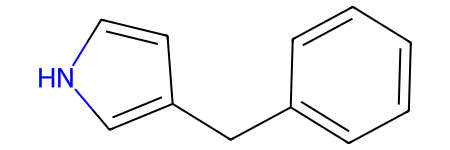

fragment score:  0.064
average matched molecule score:  0.251
number of matched broad800k molecules:  65
average matched hepg2 growth:  1.022
average matched primary growth:  1.014
length of fragment:  12
matching abx


RuntimeError: Pre-condition Violation
	no draw context
	Violation occurred on line 214 in file Code/GraphMol/MolDraw2D/MolDraw2DCairo.cpp
	Failed Expression: dp_cr
	RDKIT: 2022.09.3
	BOOST: 1_78


In [4]:
run_pipeline(fragment_path=fragment_path, compound_path=compound_path, result_path=result_path, fragment_smi_col=fragment_smi_col, compound_smi_col=compound_smi_col, fragment_hit_col=fragment_hit_col, compound_hit_col=compound_hit_col, fragment_score=fragment_score, compound_score=compound_score, fragment_require_more_than_coh=fragment_require_more_than_coh, fragment_remove_pains_brenk=fragment_remove_pains_brenk, compound_remove_pains_brenk=compound_remove_pains_brenk, fragment_druglikeness_filter=fragment_druglikeness_filter, compound_druglikeness_filter=compound_druglikeness_filter, fragment_remove_patterns=fragment_remove_patterns, frags_cannot_disrupt_rings=frags_cannot_disrupt_rings, fragment_length_threshold=fragment_length_threshold, toxicity_threshold_if_present=toxicity_threshold_if_present, toxicity_threshold_require_presence=toxicity_threshold_require_presence, abx_path=abx_path, abx_smiles_col=abx_smiles_col, abx_name_col=abx_name_col, train_set_path=train_set_path, train_set_smiles_col=train_set_smiles_col, train_set_name_col=train_set_name_col, analogues_pval_diff_thresh=analogues_pval_diff_thresh, analogues_absolute_diff_thresh=analogues_absolute_diff_thresh, cpd_name_col=cpd_name_col, display_inline_candidates=display_inline_candidates, purch_path=purch_path, purch_name_col=purch_name_col, purch_name_needs_split=purch_name_needs_split, cpd_sim_to_abx=cpd_sim_to_abx, cpd_sim_to_train_set=cpd_sim_to_train_set)